# Coherence

Lets start with some sine-waves

In [22]:
import sys
sys.path.append('../src/')

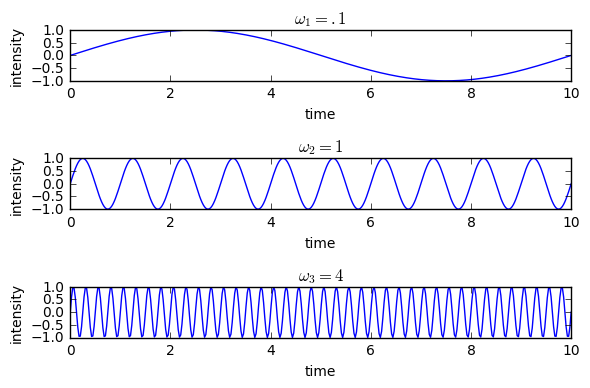

In [23]:
from utils.fourier import (butter_lowpass_filter,
                           butter_highpass_filter,
                           butter_bandpass_filter,
                           butter_bandstop_filter)
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
T = 10 # Signal lasts 10 seconds
Fs = 40 # We sample the signal at 40 Hz
w1 = .1
w2 = 1
w3 = 4
sample_points = np.linspace(0, T, T * Fs)
sines_w1 = np.sin(w1 * 2 * np.pi * sample_points)
sines_w2 = np.sin(w2 * 2 * np.pi * sample_points)
sines_w3 = np.sin(w3 * 2 * np.pi * sample_points)
plt.subplot(3, 1, 1)
plt.plot(sample_points, sines_w1)
plt.xlabel("time")
plt.ylabel("intensity")
plt.title(r'$\omega_1 = .1$')
plt.subplot(3, 1, 2)
plt.plot(sample_points, sines_w2)
plt.title(r'$\omega_2 = 1$')
plt.xlabel("time")
plt.ylabel("intensity")
plt.subplot(3, 1, 3)
plt.plot(sample_points, sines_w3)
plt.title(r'$\omega_3 = 4$')
plt.xlabel("time")
plt.ylabel("intensity")
plt.tight_layout()
plt.show()

Summing these signals gives:

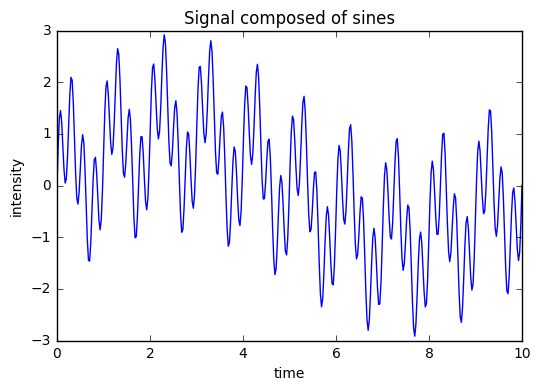

In [24]:
x = sines_w1 + sines_w2 + sines_w3
plt.plot(sample_points, x)
plt.title('Signal composed of sines')
plt.xlabel("time")
plt.ylabel("intensity")
plt.show()

We can convert this signal to the frequency domain with a Fourier Transform to see what frequency signals compose it:

In [28]:
fs = 10e3
N = 1e5
amp = 20
freq = 1234.0
noise_power = 0.001 * fs / 2
time = np.arange(N) / fs
b, a = signal.butter(2, 0.25, 'low')
x = np.random.normal(scale=np.sqrt(noise_power), size=time.shape)
y = signal.lfilter(b, a, x)
x += amp*np.sin(2*np.pi*freq*time)
y += np.random.normal(scale=0.1*np.sqrt(noise_power), size=time.shape)

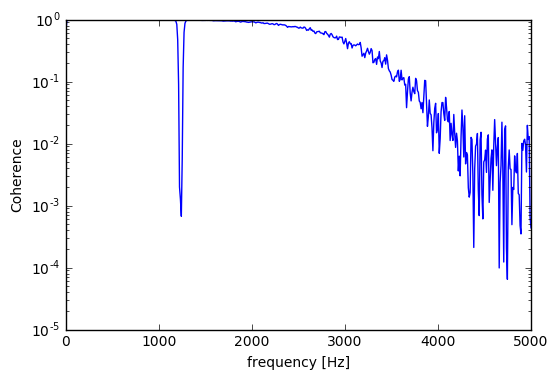

In [30]:
f, Cxy = signal.coherence(x, y, fs, nperseg=1024)
plt.semilogy(f, Cxy)
plt.xlabel('frequency [Hz]')
plt.ylabel('Coherence')
plt.show()

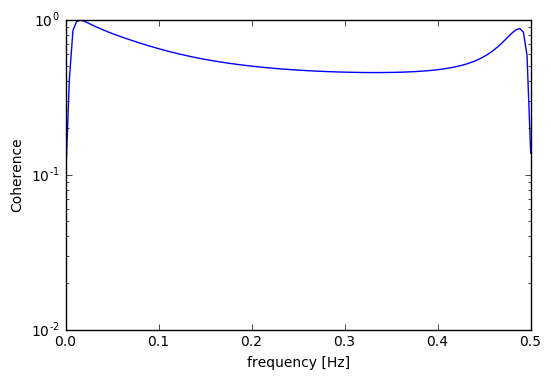

In [33]:
f, Cxy = signal.coherence(sines_w1, sines_w2)
plt.semilogy(f, Cxy)
plt.xlabel('frequency [Hz]')
plt.ylabel('Coherence')
plt.show()